# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


import keras
from pandas import read_csv
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm



In [10]:
!pip install nltk
import nltk
import spacy
import string
import re
nltk.download('all')
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning:

Can't initialize NVML

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data] 

True

In [16]:
from google.colab import drive
drive.mount('/content/drive')
dataset=pd.read_csv("/content/drive/MyDrive/moynul/Deprassion_Detection_Data_Set_M.csv",encoding='latin')
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Text,class
0,Not everything is made of giggles and sunshine...,Sad
1,Happiness and sadness are two sides of the sam...,Sad
2,Nobody knows about the emotional breakdowns I ...,Sad
3,Just because I can carry my troubles well does...,Sad
4,Getting flashbacks suck when they??re memorie...,Sad


In [18]:
dataset=dataset.drop_duplicates()
dataset.shape

(5255, 2)

In [19]:
# Print the value counts of the Label column
print(dataset["class"].value_counts())

Angry      1691
Anxiety    1435
Sad        1124
Happy      1005
Name: class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



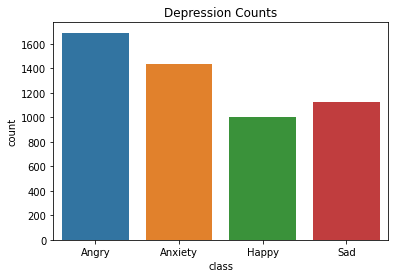

In [20]:
# Change the datatype as "category"
dataset["class"] = dataset["class"].astype("category")# Visualize the Label counts
sns.countplot(dataset["class"])
plt.title("Depression Counts")
plt.savefig("sentiment411")
plt.show()

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer=nltk.SnowballStemmer('english')
STOPWORDS=stopwords.words('english')
PUNCT_TO_REMOVE = string.punctuation

In [22]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
dataset['Text'] = dataset['Text'].apply(remove_emoji)

In [23]:
def clean_text(text):
    
    text = word_tokenize(text)                                                     # tokenize
    text = str(text).lower()                                                       # converting to lower case
    text = re.sub(r'@\S+|http\S+|www.\S+|\n','',text)                              # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                                    # removing special characters 
    text = [stemmer.stem(word) for word in text.split(' ')]                        # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])              # remove stopwords
    text = text.strip()                                                            # remove extra spaces from start and end of string
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))                  # remove puncuation
     
    return text

dataset['clean_data'] = dataset['Text'].apply(clean_text)


In [24]:
dataset.head(10)

,Text,class,clean_data
0,Not everything is made of giggles and sunshine...,Sad,everyth made giggl sunshin everi frown raind...
1,Happiness and sadness are two sides of the sam...,Sad,happi sad two side coin whi itx9f realli un...
2,Nobody knows about the emotional breakdowns I ...,Sad,nobodi know emot breakdown experi ix9f alon ...
3,Just because I can carry my troubles well does...,Sad,becaus carri troubl well doesnx9f mean donx9...
4,Getting flashbacks suck when they??re memorie...,Sad,get flashback suck theyx9f memori youx9f a...
5,"Pain is hard to avoid. Actually, just the act ...",Sad,pain hard avoid actual act tri avoid alreadi...
6,Remember that pessimism isn??t really bad at ...,Sad,rememb pessim isnx9f realli bad peopl disap...
7,"####Whenever happiness visits me, bad things h...",Sad,whenev happi visit bad thing happen right ix...
8,Wouldn??t it be terrific if we could turn bac...,Sad,wouldnx9f terrif could turn back time could...
9,"All human souls are connected, which explains ...",Sad,human soul connect explain whi hurt much detach


In [25]:
# Get the tweet lengths
dataset["length"] = dataset["clean_data"].str.len()# Get the number of words in tweets
dataset["words"] = dataset["clean_data"].str.split().str.len()# Display the new columns
display(dataset[["length", "words"]])

,length,words
0,58,9
1,80,13
2,81,13
3,67,10
4,62,9
...,...,...
5679,69,13
5680,84,15
5681,165,29
5682,111,20


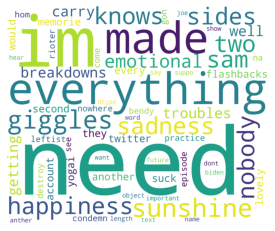

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

def preprocessing(data):
        # convert all words to lowercase
        data = str(data).lower()
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = data.strip()
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        return preprocessed_data

        
def create_word_cloud(final_data):
        wordcloud = WordCloud(stopwords=preprocessing(final_data), background_color="white", width=3000,height=2500).generate(preprocessing(final_data) )
        # plt the image generated by WordCloud class
        #plt.figure(1,figsize=(13,13))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.savefig("stopword1")
        plt.show()
create_word_cloud(dataset['Text'])

In [27]:
number = LabelEncoder()
dataset['label'] = number.fit_transform(dataset['class'])
dataset['label']

0       3
1       3
2       3
3       3
4       3
       ..
5679    1
5680    1
5681    1
5682    1
5684    1
Name: label, Length: 5255, dtype: int64

In [29]:
dataset

,Text,class,clean_data,length,words,label
0,Not everything is made of giggles and sunshine...,Sad,everyth made giggl sunshin everi frown raind...,58,9,3
1,Happiness and sadness are two sides of the sam...,Sad,happi sad two side coin whi itx9f realli un...,80,13,3
2,Nobody knows about the emotional breakdowns I ...,Sad,nobodi know emot breakdown experi ix9f alon ...,81,13,3
3,Just because I can carry my troubles well does...,Sad,becaus carri troubl well doesnx9f mean donx9...,67,10,3
4,Getting flashbacks suck when they??re memorie...,Sad,get flashback suck theyx9f memori youx9f a...,62,9,3
...,...,...,...,...,...,...
5679,need another twitter account every second im w...,Anxiety,need anoth twitter account everi second im wan...,69,13,1
5680,would lovely yogai need practice im bendy come...,Anxiety,would love yogai need practic im bendi come he...,84,15,1
5681,nowhere see condemn leftist rioter destroy hom...,Anxiety,nowher see condemn leftist rioter destroy home...,165,29,1
5682,episode gonna important future show need suppo...,Anxiety,episod gon na import futur show need support w...,111,20,1


In [30]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 9377
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(dataset['clean_data'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7504 unique tokens.


In [31]:
X = tokenizer.texts_to_sequences(dataset['clean_data'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5255, 150)


In [32]:
Y = pd.get_dummies(dataset['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5255, 4)


In [33]:
X

array([[   0,    0,    0, ..., 3087,  226,  107],
       [   0,    0,    0, ..., 3089,  595,  900],
       [   0,    0,    0, ...,   14,  188,  107],
       ...,
       [   0,    0,    0, ..., 7502,  229,  773],
       [   0,    0,    0, ...,  155,   84, 1906],
       [   0,    0,    0, ..., 1193, 2072,  417]], dtype=int32)

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 69)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
     

(4204, 150) (4204, 4)
(1051, 150) (1051, 4)


In [76]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          937700    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 150, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
Total params: 980,200
Trainable params: 980,200
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
epochs = 10
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
     

Epoch 1/10
60/60 [==============================] - 20s 291ms/step - loss: 1.3000 - accuracy: 0.3822 - val_loss: 1.0704 - val_accuracy: 0.5867
Epoch 2/10
60/60 [==============================] - 17s 287ms/step - loss: 0.8857 - accuracy: 0.6622 - val_loss: 0.6535 - val_accuracy: 0.7767
Epoch 3/10
60/60 [==============================] - 17s 287ms/step - loss: 0.4932 - accuracy: 0.8282 - val_loss: 0.5293 - val_accuracy: 0.8171
Epoch 4/10
60/60 [==============================] - 17s 290ms/step - loss: 0.3514 - accuracy: 0.8795 - val_loss: 0.5328 - val_accuracy: 0.8100
Epoch 5/10
60/60 [==============================] - 17s 287ms/step - loss: 0.2606 - accuracy: 0.9154 - val_loss: 0.5415 - val_accuracy: 0.8052
Epoch 6/10
60/60 [==============================] - 19s 323ms/step - loss: 0.2141 - accuracy: 0.9292 - val_loss: 0.5497 - val_accuracy: 0.8124


In [79]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

33/33 [==============================] - 1s 29ms/step - loss: 0.5992 - accuracy: 0.8030
Test set
  Loss: 0.599
  Accuracy: 0.803


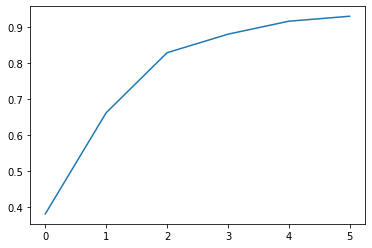

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])


In [81]:
from sklearn import metrics
preds = np.round(model.predict((X_test)),0)
print("rounded test_labels",preds)

33/33 [==============================] - 1s 29ms/step
rounded test_labels [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [82]:
test_labels = np.array((Y_test))
experiment_labels = ["0","1","2","3"]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       344
           1       0.92      0.87      0.89       287
           2       0.76      0.65      0.70       191
           3       0.84      0.69      0.75       229

   micro avg       0.82      0.78      0.80      1051
   macro avg       0.82      0.76      0.79      1051
weighted avg       0.82      0.78      0.80      1051
 samples avg       0.78      0.78      0.78      1051



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [83]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a=precision_score(Y_test, preds,average='micro')
b=recall_score(Y_test, preds,average='micro')
c=f1_score(Y_test, preds,average='micro')
print("Precision_score",a)
print("Recall_score",b)
print("F1_score",c)

Precision_score 0.8234704112337011
Recall_score 0.7811607992388202
F1_score 0.8017578125


33/33 [==============================] - 1s 28ms/step


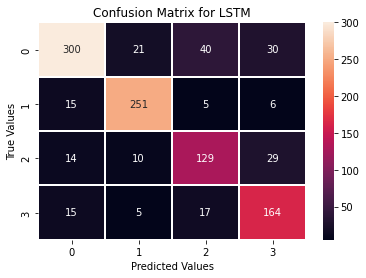

In [84]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(6, 4))

pred = model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(Y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.title("Confusion Matrix for LSTM")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

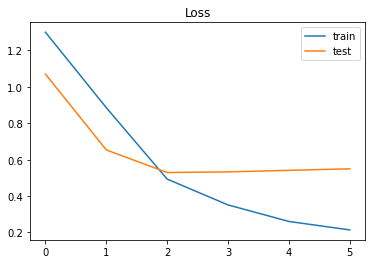

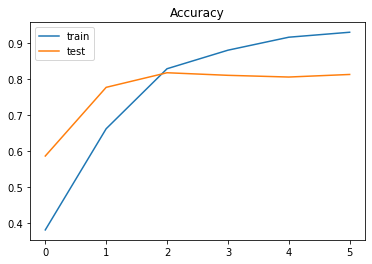

In [85]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [86]:
new_complaint = ['She is in trouble']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['0','1','2','3']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 49ms/step
[[0.04855633 0.0057228  0.05383458 0.8918863 ]] 3


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Conv1D

In [56]:
# Neural Network architecture

cnn_model = Sequential()
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1], trainable=False)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(4, activation='softmax'))

In [57]:
# Model compiling
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          937700    
                                                                 
 conv1d_1 (Conv1D)           (None, 146, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,002,344
Trainable params: 64,644
Non-trainable params: 937,700
_________________________________________________________________
None


In [66]:
# Model training
cnn_model_history = cnn_model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/30
53/53 [==============================] - 4s 73ms/step - loss: 0.2826 - accuracy: 0.9343 - val_loss: 0.5468 - val_accuracy: 0.8145
Epoch 2/30
53/53 [==============================] - 4s 73ms/step - loss: 0.2658 - accuracy: 0.9355 - val_loss: 0.5563 - val_accuracy: 0.8086
Epoch 3/30
53/53 [==============================] - 4s 72ms/step - loss: 0.2488 - accuracy: 0.9456 - val_loss: 0.5499 - val_accuracy: 0.8086
Epoch 4/30
53/53 [==============================] - 4s 72ms/step - loss: 0.2319 - accuracy: 0.9545 - val_loss: 0.5595 - val_accuracy: 0.8098


In [67]:
accr = cnn_model.evaluate(X_test,Y_test,verbose=1)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

33/33 [==============================] - 0s 14ms/step - loss: 0.6658 - accuracy: 0.7564
Test set
  Loss: 0.666
  Accuracy: 0.756


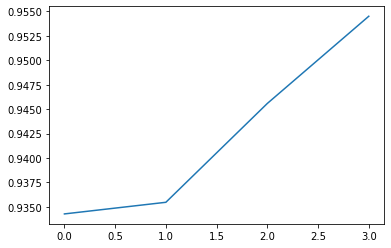

In [68]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['accuracy'])


In [69]:
test_labels = np.array((Y_test))
experiment_labels = ['0','1','2','3']
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       370
           1       0.89      0.89      0.89       272
           2       0.77      0.55      0.64       186
           3       0.82      0.77      0.80       223

   micro avg       0.84      0.78      0.81      1051
   macro avg       0.83      0.76      0.79      1051
weighted avg       0.83      0.78      0.80      1051
 samples avg       0.78      0.78      0.78      1051



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [70]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a1=precision_score(Y_test, preds,average='micro')
b1=recall_score(Y_test, preds,average='micro')
c1=f1_score(Y_test, preds,average='micro')
print("Precision_score",a1)
print("Recall_score",b1)
print("F1_score",c1)

Precision_score 0.8355464759959143
Recall_score 0.7783063748810657
F1_score 0.805911330049261


33/33 [==============================] - 0s 14ms/step


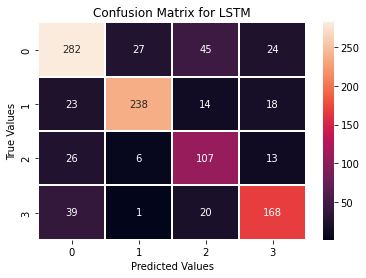

In [71]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(6, 4))

pred = cnn_model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(Y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.title("Confusion Matrix for LSTM")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

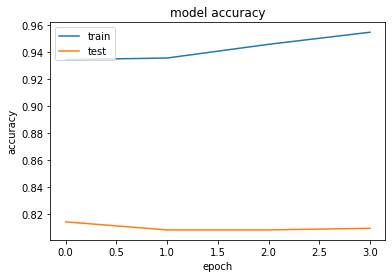

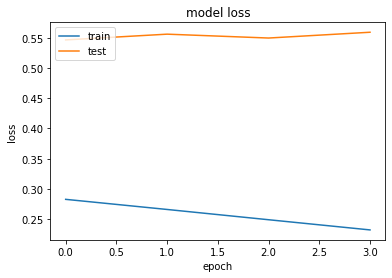

In [72]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [73]:
new_complaint = ['She is in trouble']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = cnn_model.predict(padded)
labels = ['0','1','2','3']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 19ms/step
[[0.1038982  0.01579236 0.18568352 0.6946259 ]] 3
